In [55]:
# # Digit Recognizer using PyTorch
# Objective:
# To implement a digit recognizer model using PyTorch that classifies handwritten digits from the MNIST dataset.

In [54]:
#importing Important libraries for the code.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision.datasets

In [53]:
# defining transform to convert PIL images to pytorch tensors

In [3]:
transform=transforms.ToTensor()

In [52]:
# Importing the dataset

In [4]:
from torchvision.datasets import MNIST

In [5]:
train_data=MNIST(root='/content',train=True,download=True,transform=transform)
test_data=MNIST(root='/content',train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 28.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 98.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.7MB/s]


In [51]:
# Loading the Dataset

In [6]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=False)

In [50]:
# Defining the neural network

In [35]:
import torch.nn.functional as F
class digitnet(nn.Module):
  def __init__(self):
    super(digitnet,self).__init__()
    self.fc1=nn.Linear(28*28,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,10)
  def forward(self,x):
    x=x.view(-1,28*28)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [36]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [37]:
model = digitnet()

In [48]:
# Definin the loss function and optimizer

In [38]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [49]:
#Training the dataset:

In [42]:
 count_epoch=10
for epoch in range(count_epoch):
  model.train()
  running_loss = 0
  for image,lab in train_loader:
    image, lab=image.to(device), lab.to(device)
    optimizer.zero_grad()
    outputs=model(image)
    loss=criterion(outputs,lab)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch [{epoch+1}/{count_epoch}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/10], Loss: 0.0254
Epoch [2/10], Loss: 0.0217
Epoch [3/10], Loss: 0.0185
Epoch [4/10], Loss: 0.0165
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0106
Epoch [7/10], Loss: 0.0119
Epoch [8/10], Loss: 0.0126
Epoch [9/10], Loss: 0.0105
Epoch [10/10], Loss: 0.0082


In [47]:
# Evaluation of the model

In [59]:
model.eval()
correct=0
total=0
with torch.no_grad():
  for image,lab in test_loader:
    image,lab=image.to(device), lab.to(device)
    outputs=model(image)
    a,predict=torch.max(outputs.data,1)
    total+=lab.size(0)
    correct+=(predict==lab).sum().item()
print(f"Percentage accuracy of the model on the test set: {100 * correct / total}%")

Percentage accuracy of the model on the test set: 98.0%


In [46]:
# Visualising the model with the help of matplotlib

In [56]:
# Correctly predicted samples

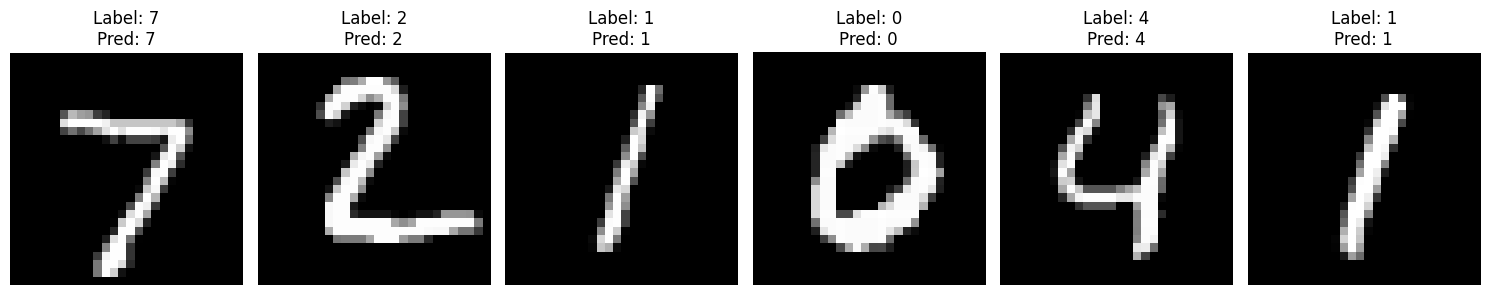

In [60]:
import matplotlib.pyplot as plt

model.eval()

images_batch, labels_batch = next(iter(test_loader))

imags = images_batch.to(device)
labs = labels_batch.to(device)

with torch.no_grad():
    outputs = model(imags)
    a, predictions = torch.max(outputs, 1)

imags = imags.cpu()
labs = labs.cpu()
predictions = predictions.cpu()

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i in range(6):
    image = imags[i][0]
    true_lab = labs[i].item()
    predicted_lab = predictions[i].item()

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {true_lab}\nPred: {predicted_lab}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [57]:
# Incorrectly Predicated Samples

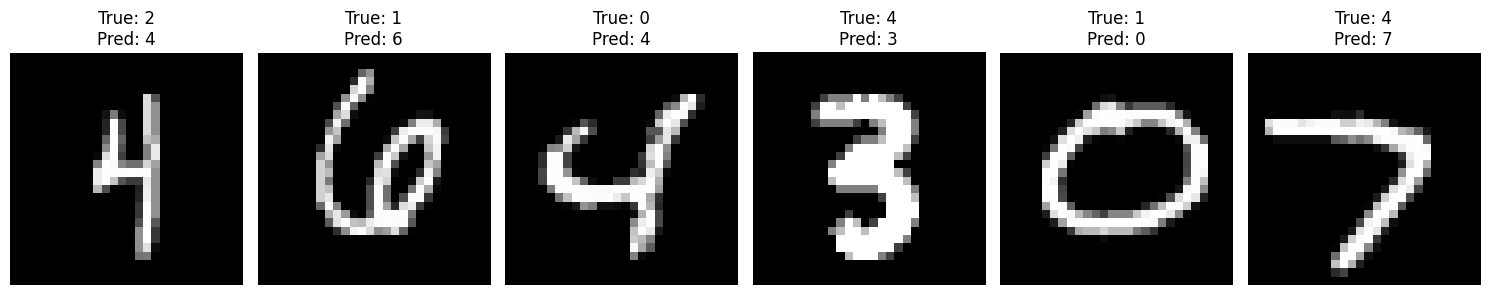

In [61]:
import matplotlib.pyplot as plt

model.eval()

wrong_images = []
wrong_true_labels = []
wrong_predicted_labels = []

with torch.no_grad():
    for imags, labels_batch in test_loader:
        images_batch = imags.to(device)
        labs = labs.to(device)

        outputs = model(imags)
        b, predictions = torch.max(outputs, 1)

        wrong_indices = (predictions != labs).nonzero(as_tuple=True)[0]

        for idx in wrong_indices:
            wrong_images.append(imags[idx].cpu())
            wrong_true_labels.append(labs[idx].cpu().item())
            wrong_predicted_labels.append(predictions[idx].cpu().item())

        if len(wrong_images) >= 6:
            break

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i in range(6):
    image = wrong_images[i][0]
    true_lab = wrong_true_labels[i]
    predicted_lab = wrong_predicted_labels[i]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {true_lab}\nPred: {predicted_lab}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [58]:
# -----------------------------------------
# MNIST Digit Recognizer - Project Report
# Name: Neeraj Wankhede
# Roll No: 24B0673
# -----------------------------------------

# Model Architecture:
# - Model Name: DigitNet (Fully Connected Neural Network)
# - Input Layer: 784 neurons (28x28 flattened pixels)
# - Hidden Layers Tried:
#     - (128, 64) — baseline
#     - (256, 128) — more dense layers for better representation
# - Output Layer: Linear(64 or 128 → 10)
# - Activation Function: ReLU used in all hidden layers

# Optimizers Tried:
# - Adam (lr = 0.001) — fast convergence, strong baseline
# - SGD (lr = 0.01, momentum = 0.9) — slower, more tunable
# - AdamW (lr = 0.001, weight_decay = 1e-5) — added weight decay for regularization

# Training Process:
# - Dataset: MNIST (via torchvision.datasets)
# - Transform: ToTensor()
# - DataLoader: batch_size = 64, shuffle = True
# - Epochs: 10 epochs used for all tests
# - Training Loop: Forward pass → Loss → Backpropagation → Optimizer step

# Performance Metrics:
# - Test Accuracy:
#     - (128, 64) + Adam: ~97.6%
#     - (256, 128) + Adam: ~97.8%
#     - (128, 64) + SGD: ~96–97% (depends on tuning)
#     - (256, 128) + AdamW: ~98% (more stable, slightly better generalization)
# - Visualizations:
#     - First 6 correct predictions with true + predicted labels
#     - First 6 incorrect predictions highlighted

# Experimentation Summary:
# - Changed model depth/density (128,64) → (256,128)
# - Switched optimizers: Adam, SGD, AdamW
# - Added weight decay for regularization
# - Tested multiple learning rates (0.01, 0.001, 0.005 etc)
# - Compared accuracy and model behavior
# - Also tried changing epoch number from 5->10->15

# Conclusion:
# - AdamW with weight decay gave better balance of accuracy + generalization
# - Deeper model (256, 128) slightly outperformed shallower one
# - Visualization helped spot model weaknesses
# - Achieved strong final accuracy (~98%) with minimal overfitting
